In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import colormaps
import math
matplotlib.rcParams.update({'font.size': 17})

## Previously Gathered Data - Shared FCL per dimension

In [10]:
fcl_layer_shared_per_dim =[
    [(98.11789772727272, 93.77367424242424, 0.9065617806951841, 0.9352610930735928)],   # 100 dim
    [(99.609375, 95.26515151515152, 0.9762962962962963, 0.9503697691197693)],           # 500 dim
    [(99.81060606060606, 95.32433712121212, 0.9888888888888889, 0.9513697240259741)],   # 1000 dim
    [(99.28977272727272, 94.87452651515152, 0.9577777777777778, 0.9437924633237135)],   # 1500 dim
    [(99.34895833333334, 95.45454545454545, 0.9614102564102565, 0.9508301016113516)]    # 2000 dim 
]

## Visualize Performance - Shared FCL per dimension

/var/folders/w9/94vqs82s3gq0qywpffjb890w0000gn/T/ipykernel_73635/3822112543.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('inferno', 7)


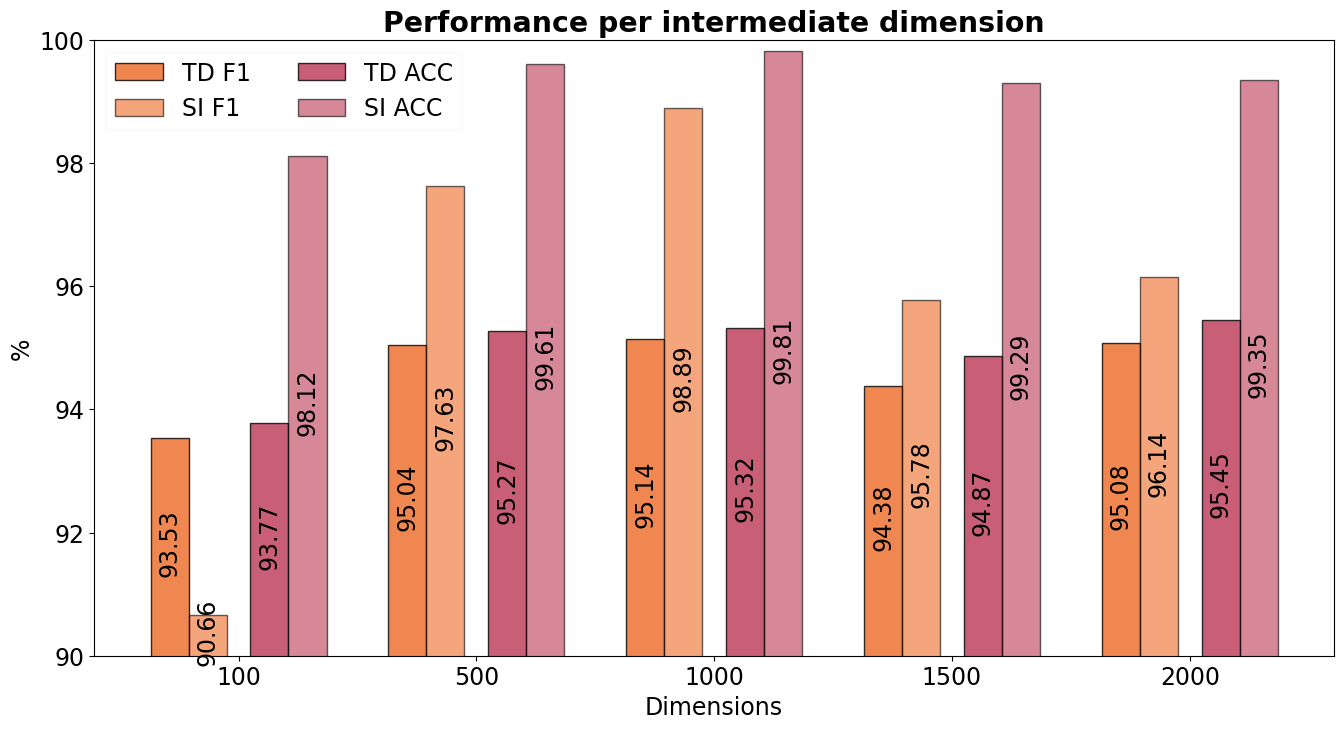

In [14]:
# prepare dataframe
fcl_layer_shared_per_dim_df = pd.DataFrame(columns=['Task','100','500','1000','1500','2000'])
fcl_layer_shared_per_dim_df.loc[0] = np.concatenate((["SI ACC"], [i[0][0] for i in fcl_layer_shared_per_dim]))
fcl_layer_shared_per_dim_df.loc[1] = np.concatenate((["TD ACC"], [i[0][1] for i in fcl_layer_shared_per_dim]))
fcl_layer_shared_per_dim_df.loc[2] = np.concatenate((["SI F1"], [i[0][2]*100 for i in fcl_layer_shared_per_dim]))
fcl_layer_shared_per_dim_df.loc[3] = np.concatenate((["TD F1"], [i[0][3]*100 for i in fcl_layer_shared_per_dim]))

# prepare plot
w = 1.0
num_dim = len(fcl_layer_shared_per_dim_df.columns) - 1 
num_performance_values = len(fcl_layer_shared_per_dim_df)

first_tick = int(math.ceil((num_performance_values*w/2))) 
gap = num_performance_values*w + 1
x = np.array([first_tick + i*gap for i in range(num_dim)])

colors = colormaps['inferno']
colors = plt.cm.get_cmap('inferno', 7)

# create plot
fig,ax = plt.subplots(1,1, figsize=(16,8))
b = []
dist = 0.25
help_c = [3,3,4,4]
shade = [0.6, 0.8, 0.6, 0.8]
for i in range(num_performance_values)[::-1]:
    if i < 2:
        dist = -0.25
    b.append(ax.bar(x - (i - num_performance_values/2 + 0.5)*w*0.8 - dist, 
             fcl_layer_shared_per_dim_df.loc[i].values[1:].astype(float).round(2), 
             width=w*0.8, 
             color=colors(help_c[i]), 
             align='center', 
             edgecolor = 'black', 
             linewidth = 1.0, 
             alpha=shade[i]))
ax.legend([b_ for b_ in b], 
           fcl_layer_shared_per_dim_df['Task'].values.tolist()[::-1], 
           ncol = 2, 
           loc = 'best', 
           framealpha = 0.1)

ax.set_ylabel('%')
ax.set_xlabel('Dimensions')
ax.set_title('Performance per intermediate dimension', fontweight="bold")
ax.set_xticks(x)
ax.set_ylim(90, 100)
ax.set_xticklabels(fcl_layer_shared_per_dim_df.columns.values[1:])
for i in range(num_performance_values):
    ax.bar_label(b[i], 
                 padding = 3,
                 label_type='center', 
                 rotation = 'vertical')
plt.savefig('performance_per_dimension_fcl_shared_model.pdf', format='pdf')
plt.show()

## Previously Gathered Data - All models with optimized parameters

In [12]:
all_optimized_models = [
    [99.47916666666666, 94.74431818181817, 0.9688176638176639, 0.9455909541847043],     # FCL Split
    [99.86979166666666, 96.10558712121212, 0.9925925925925926, 0.959837962962963],      # FCL Shared
    [99.609375, 95.13494318181817, 0.9777065527065528, 0.9504836309523809],             # SelfAttent
    [99.15956439393939, 93.31202651515152, 0.9565753309870958, 0.9319872835497836],     # EGGNA
    [97, 96, 0, 0]                                                                      # MTNN (external)
]

## Visualize Data - All models with optimized parameters

/var/folders/w9/94vqs82s3gq0qywpffjb890w0000gn/T/ipykernel_73635/1640205893.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('inferno', 6)
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


<BarContainer object of 5 artists>
<BarContainer object of 5 artists>
<BarContainer object of 5 artists>
<BarContainer object of 5 artists>


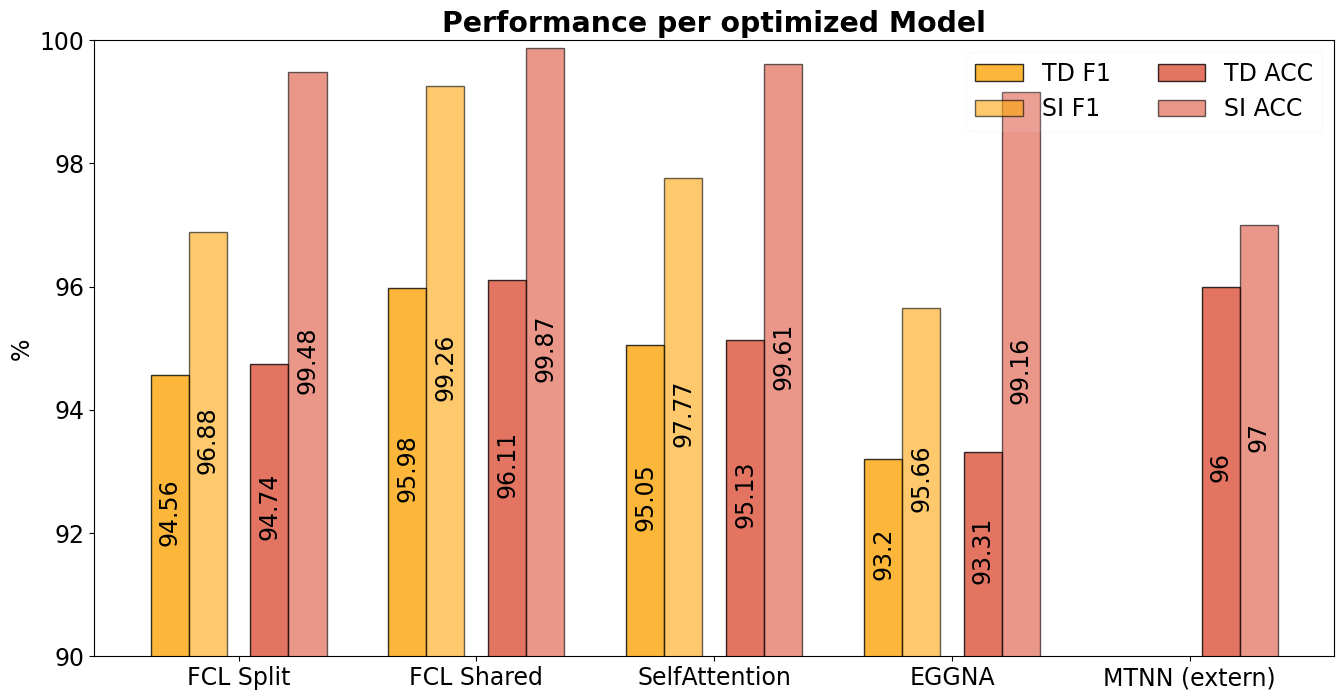

In [13]:
# prepare dataframe
all_optimized_models_df = pd.DataFrame(columns=['Task','FCL Split','FCL Shared','SelfAttention','EGGNA','MTNN (extern)'])
all_optimized_models_df.loc[0] = np.concatenate((["SI ACC"], [i[0] for i in all_optimized_models]))
all_optimized_models_df.loc[1] = np.concatenate((["TD ACC"], [i[1] for i in all_optimized_models]))
all_optimized_models_df.loc[2] = np.concatenate((["SI F1"], [i[2]*100 for i in all_optimized_models]))
all_optimized_models_df.loc[3] = np.concatenate((["TD F1"], [i[3]*100 for i in all_optimized_models]))

# prepare plot
w = 1.0
num_models = len(all_optimized_models_df.columns) - 1 
num_performance_values = len(all_optimized_models_df)

first_tick = int(math.ceil((num_performance_values*w/2))) 
gap = num_performance_values*w + 1
x = np.array([first_tick + i*gap for i in range(num_models)])

colors = colormaps['inferno']
colors = plt.cm.get_cmap('inferno', 6)

# create plot
fig,ax = plt.subplots(1,1, figsize=(16,8))
b = []
all_values = []
dist = 0.25
help_c = [3,3,4,4]
shade = [0.6, 0.8, 0.6, 0.8]
for i in range(num_performance_values)[::-1]:
    if i < 2:
        dist = -0.25
    all_values.append(all_optimized_models_df.loc[i].values[1:].astype(float).round(2))
    b.append(ax.bar(x - (i - num_performance_values/2 + 0.5)*w*0.8 - dist, 
             all_optimized_models_df.loc[i].values[1:].astype(float).round(2), 
             width=w*0.8, 
             color=colors(help_c[i]), 
             align='center', 
             edgecolor = 'black', 
             linewidth = 1.0, 
             alpha=shade[i]))
ax.legend([b_ for b_ in b], 
           all_optimized_models_df['Task'].values.tolist()[::-1], 
           ncol = 2, 
           loc = 'best', 
           framealpha = 0.1)

ax.set_ylabel('%')
ax.set_title('Performance per optimized Model', fontweight="bold")
ax.set_xticks(x)
ax.set_ylim(90, 100)
ax.set_xticklabels(all_optimized_models_df.columns.values[1:])
for i in range(num_performance_values):
    print(b[i])
    ax.bar_label(b[i], 
                 padding = 3,
                 label_type='center', 
                 rotation = 'vertical',
                 color = "blacK")
plt.savefig('performance_per_optimized_model.pdf', format='pdf')
plt.show()